In [70]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# machine learning
import sklearn as skl
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, auc,roc_curve,accuracy_score,f1_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#exporting model
import joblib

In [4]:
df = pd.read_csv("parkinsons.data")

In [5]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**df.de__mdvp_fo_hz __:** This feature represents the fundamental frequency of the voice in hertz. The data seems to have a wide range, with a relatively low standard deviation. The values are distributed around the mean, and there are no apparent outliers.

**mdvp_fhi_hz:** This feature indicates the highest frequency of the voice. The data shows a broader spread, with a higher standard deviation compared to the previous feature. This could suggest more variability in this aspect of voice recordings.

**mdvp_flo(hz):** This feature corresponds to the lowest frequency of the voice. Similar to the previous feature, the data displays a notable range, and the standard deviation is also relatively high.

**mdvp_Jitter(%):** This feature measures the percentage variation in fundamental frequency. The low mean and relatively low standard deviation suggest that jitter values tend to be relatively consistent, although there could be some instances of higher variation.

**mdvp_Jitter(abs):** This is the absolute value of jitter. The low mean and standard deviation imply generally consistent values, but there could be outliers affecting the distribution.

mdvp_rap and mdvp_ppq: These features are related to different aspects of jitter. They exhibit similar characteristics to the previous jitter measures, with relatively low means and standard deviations.

Jitter:DDP: This is another jitter-related feature. It correlates with the previous jitter measures, showing similar characteristics in terms of mean and standard deviation.

mdvp_Shimmer and mdvp_Shimmer(dB): These features represent measures of voice shimmer, which relates to irregularities in amplitude. Both features show moderate means and standard deviations, indicating variability in shimmer values.

Shimmer_dda: This is another measure of shimmer. The data distribution seems consistent with the other shimmer-related features, with a moderate spread.

nhr: NHR stands for the ratio of noise to tonal components in the voice. The relatively low mean and standard deviation suggest that the noise-to-tonal balance tends to be consistent across recordings.

hnr: This feature represents the harmonic-to-noise ratio. The higher mean and lower standard deviation indicate relatively consistent harmonic-to-noise ratios in the dataset.

status: This feature likely represents the health status of individuals (1 for Parkinson's, 0 for healthy). The mean indicates that a significant portion of the dataset might have Parkinson's disease.

rpde and dfa: These features seem to be numerical measures with moderate variability, as indicated by their standard deviations.

spread1 and spread2: Both features show moderate variability, with spread2 having a higher mean compared to spread1.

d2: This feature represents a dimensionality reduction measure. The data appears to have moderate variability.

ppe: This feature is related to a nonlinear dynamical complexity measure. The data displays moderate variability.scribe()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [13]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

<Axes: >

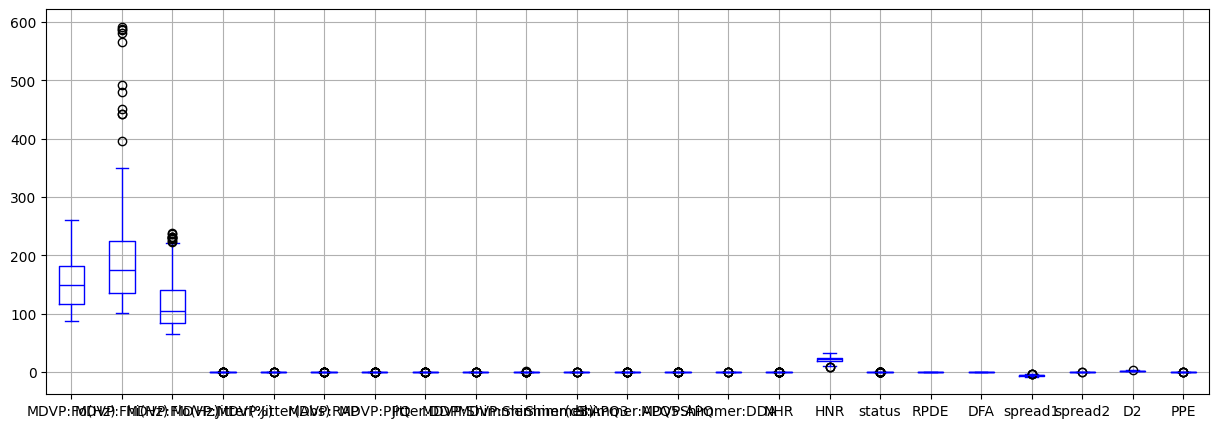

In [23]:
df.boxplot(color='blue',figsize=(15,5))

C:\Users\timug\AppData\Local\Temp\ipykernel_13492\3379057675.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature


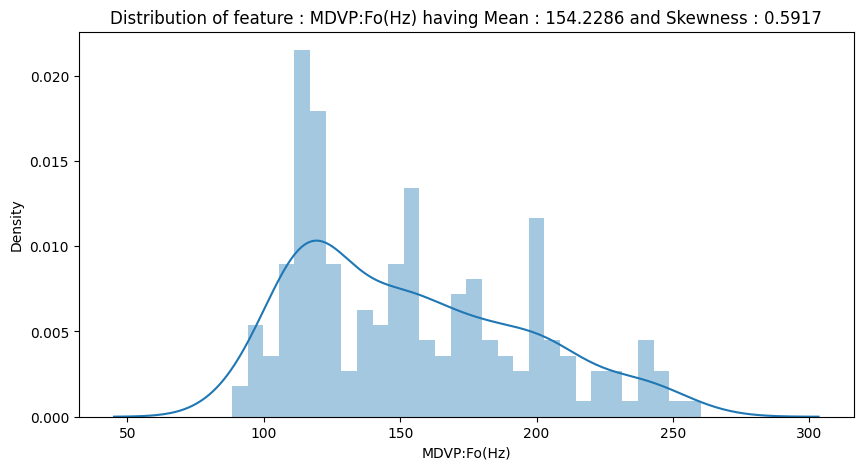

In [10]:
feature = 'MDVP:Fo(Hz)'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()


C:\Users\timug\AppData\Local\Temp\ipykernel_13492\782585184.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
C:\Users\timug\AppData\Local\Temp\ipykernel_13492\782585184.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.d

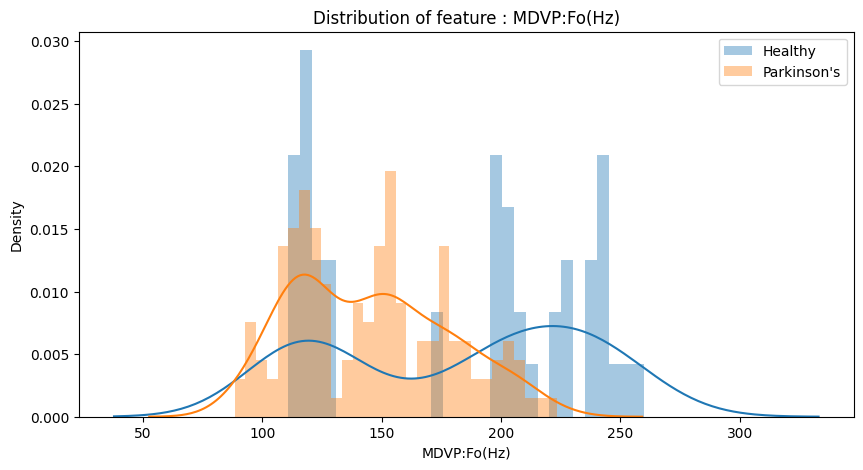

In [11]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

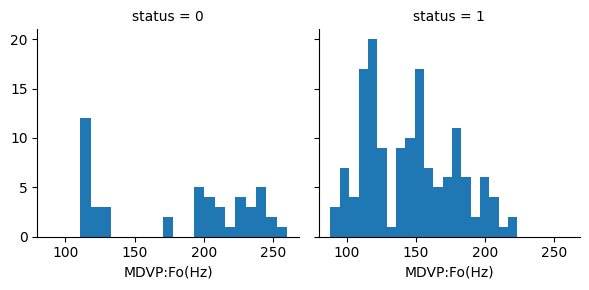

In [25]:
g = sns.FacetGrid(df, col='status')
g.map(plt.hist, 'MDVP:Fo(Hz)', bins=20)

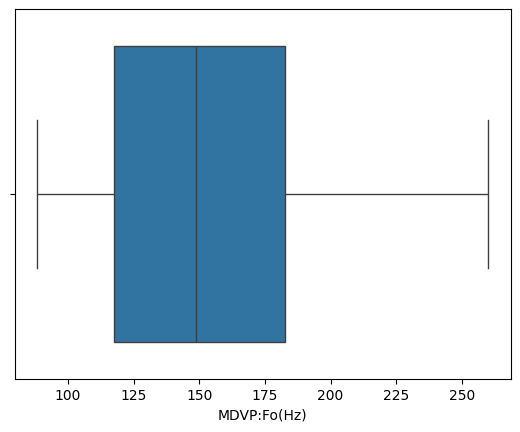

In [13]:
#checking for outliers
ax = sns.boxplot(x=df[feature]) 

C:\Users\timug\AppData\Local\Temp\ipykernel_13492\1074090499.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[feature_2], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature


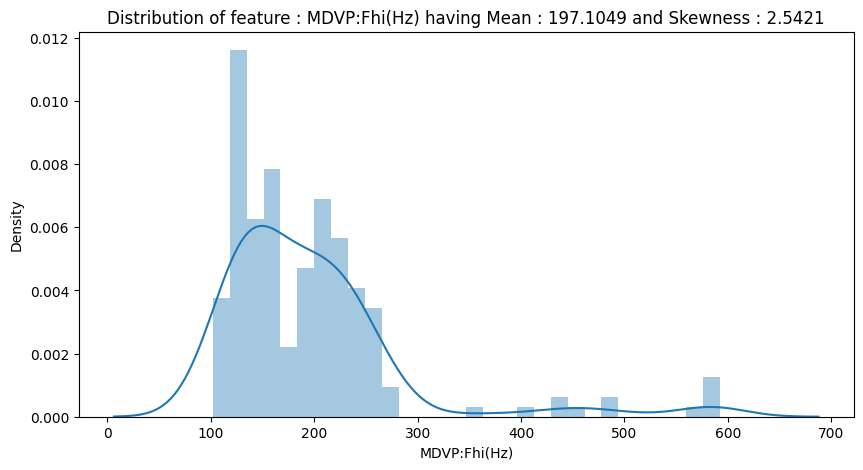

In [14]:
feature_2 = 'MDVP:Fhi(Hz)'
meanData_2 = 'Mean : ' + str(round(df[feature_2].mean(),4))        # variable to contain mean of the attribute
skewData_2 = 'Skewness : ' + str(round(df[feature_2].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(df[feature_2], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature_2+" having "+meanData_2+" and "+skewData_2)   # setting title of the figure
plt.show()

C:\Users\timug\AppData\Local\Temp\ipykernel_13492\815484326.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature_2], bins=30, kde=True, label='Healthy')
C:\Users\timug\AppData\Local\Temp\ipykernel_13492\815484326.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns

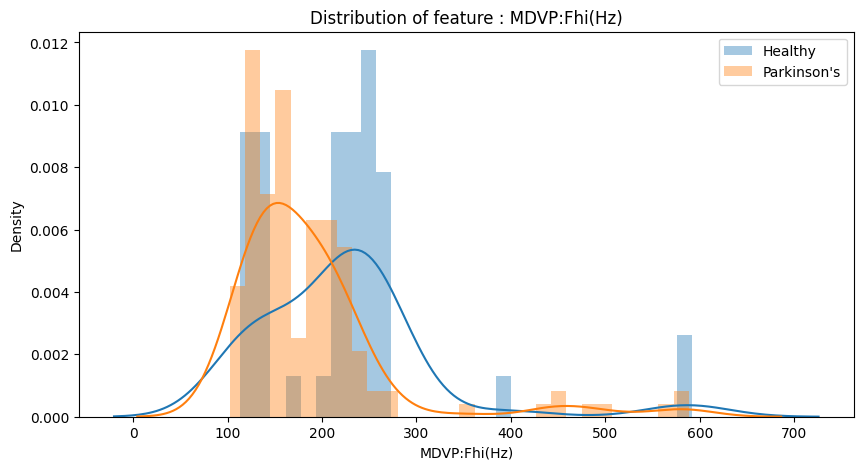

In [15]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature_2], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(df[df['status'] == 1][feature_2], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature_2)                    # setting title of the figure
plt.show()

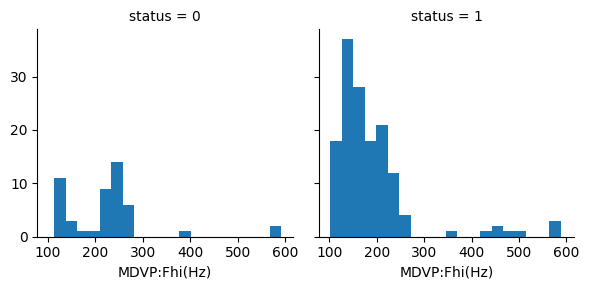

In [26]:
g = sns.FacetGrid(df, col='status')
g.map(plt.hist, 'MDVP:Fhi(Hz)', bins=20)

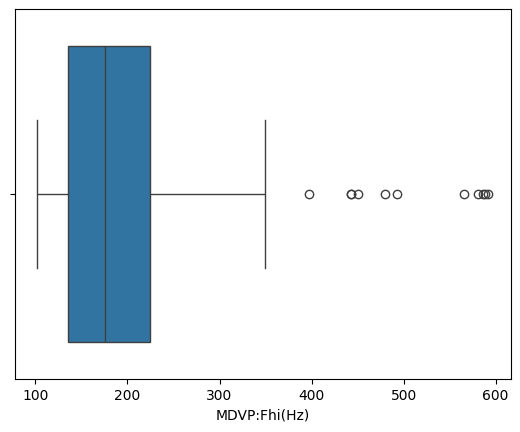

In [16]:
ax = sns.boxplot(x=df[feature_2])

In [17]:
def plot_data(df, plot_type, grid_size, fig_size, y = None):
    fig = plt.figure(figsize = fig_size)
    column_names = df.select_dtypes(exclude='object').columns
    for i, column_name in enumerate(column_names):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        if plot_type == 'hist':
            plot = sns.histplot(df[column_name], kde = True, color = 'darkblue')
        elif plot_type == 'boxplot':
             plot = sns.boxplot(y=df[column_name], x=y, color = 'red')
        else:
            raise ValueError("Input value for the parameter 'plot_type' should be 'hist' or 'boxplot'.")
        plot.set_xlabel(column_name, fontsize = 16)
    plt.tight_layout()

In [20]:
#checking for oultiers
def outliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    
    ls=df.index[(df[col]<lower_bound) | (df[col]>upper_bound) ]
    
    return ls

#function for removing outliers
def remove(df, ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [27]:
indexes_list=[]
for col in ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)']:
    indexes_list.extend(outliers(df, col))

In [29]:
indexes_list

[73, 102, 115, 116, 117, 118, 120, 149, 186, 187, 193]

In [30]:
data_clean=remove(df, indexes_list)

In [31]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              184 non-null    object 
 1   MDVP:Fo(Hz)       184 non-null    float64
 2   MDVP:Fhi(Hz)      184 non-null    float64
 3   MDVP:Flo(Hz)      184 non-null    float64
 4   MDVP:Jitter(%)    184 non-null    float64
 5   MDVP:Jitter(Abs)  184 non-null    float64
 6   MDVP:RAP          184 non-null    float64
 7   MDVP:PPQ          184 non-null    float64
 8   Jitter:DDP        184 non-null    float64
 9   MDVP:Shimmer      184 non-null    float64
 10  MDVP:Shimmer(dB)  184 non-null    float64
 11  Shimmer:APQ3      184 non-null    float64
 12  Shimmer:APQ5      184 non-null    float64
 13  MDVP:APQ          184 non-null    float64
 14  Shimmer:DDA       184 non-null    float64
 15  NHR               184 non-null    float64
 16  HNR               184 non-null    float64
 17  st

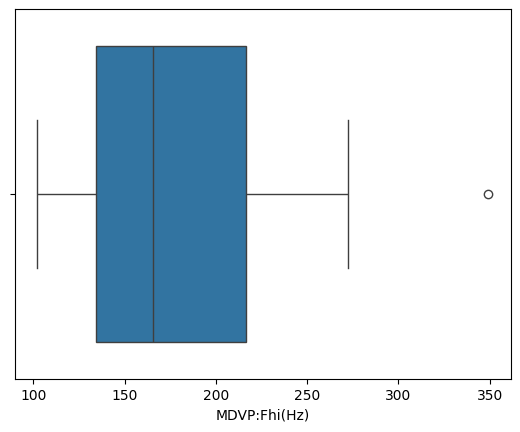

In [33]:
ax = sns.boxplot(x=data_clean['MDVP:Fhi(Hz)'])

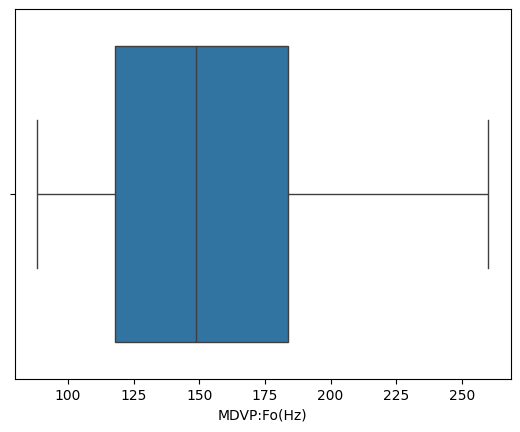

In [34]:
ax = sns.boxplot(x=data_clean['MDVP:Fo(Hz)'])

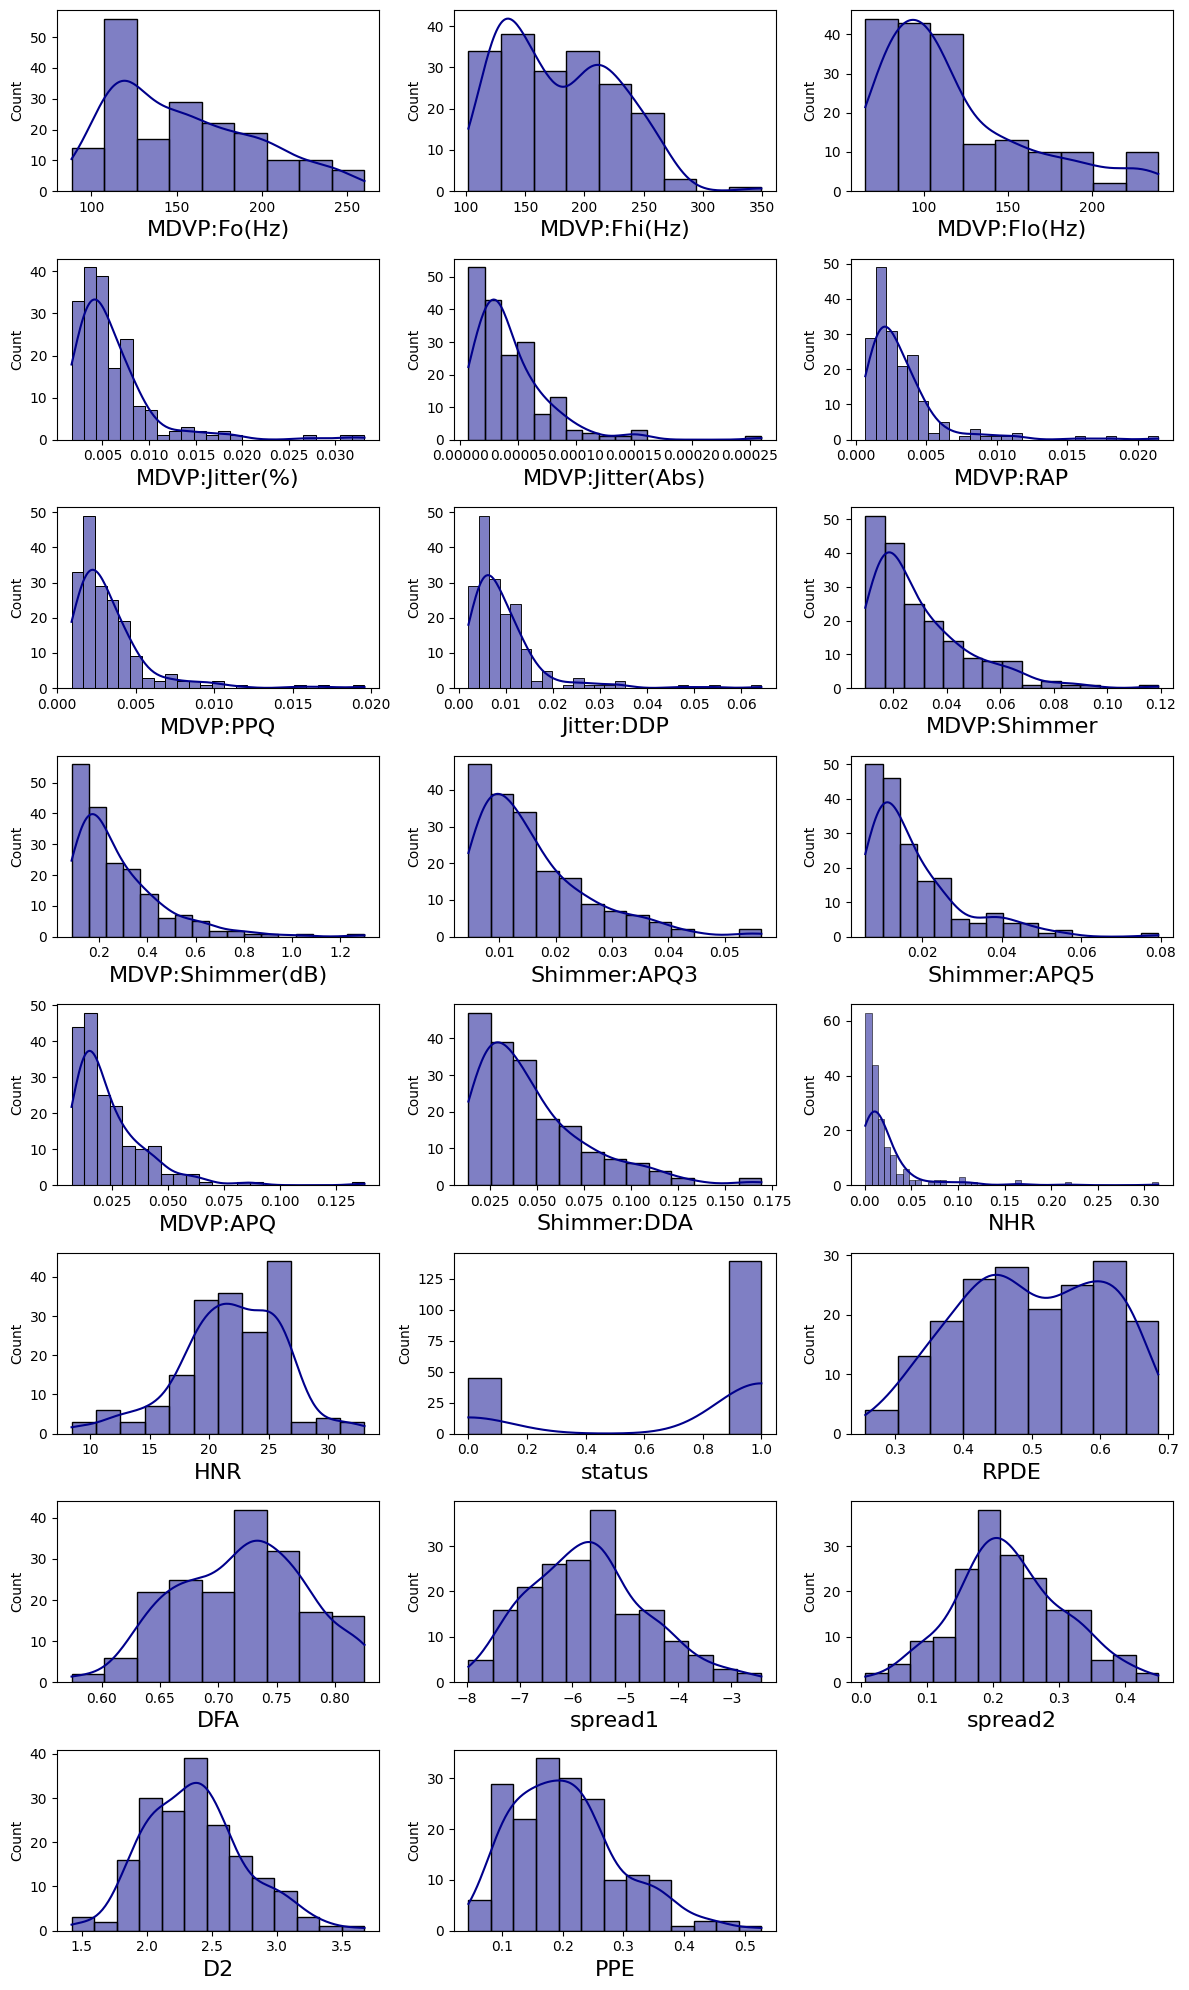

In [35]:
plot_data(data_clean, plot_type = 'hist', grid_size = (8,3), fig_size = (12, 20))

In [41]:
data_cleann=data_clean.drop(columns=['name'])

In [42]:
data_cleann.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       184 non-null    float64
 1   MDVP:Fhi(Hz)      184 non-null    float64
 2   MDVP:Flo(Hz)      184 non-null    float64
 3   MDVP:Jitter(%)    184 non-null    float64
 4   MDVP:Jitter(Abs)  184 non-null    float64
 5   MDVP:RAP          184 non-null    float64
 6   MDVP:PPQ          184 non-null    float64
 7   Jitter:DDP        184 non-null    float64
 8   MDVP:Shimmer      184 non-null    float64
 9   MDVP:Shimmer(dB)  184 non-null    float64
 10  Shimmer:APQ3      184 non-null    float64
 11  Shimmer:APQ5      184 non-null    float64
 12  MDVP:APQ          184 non-null    float64
 13  Shimmer:DDA       184 non-null    float64
 14  NHR               184 non-null    float64
 15  HNR               184 non-null    float64
 16  status            184 non-null    int64  
 17  RP

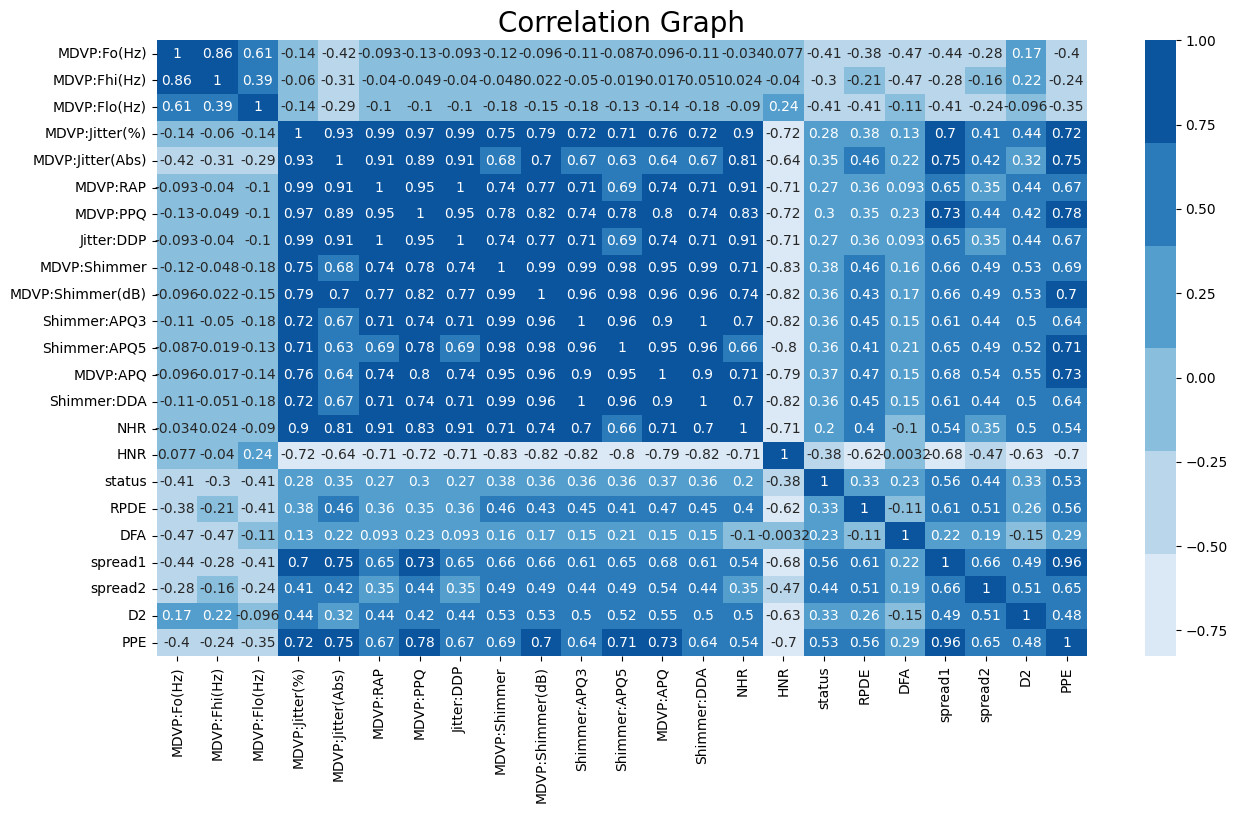

In [43]:
plt.figure(figsize=[15, 8], dpi=100)
plt.title("Correlation Graph", fontsize=20)

# Create a blue color map
cmap = sns.color_palette("Blues")

sns.heatmap(data_cleann.corr(), annot=True, cmap=cmap)

plt.show()

In [44]:
correlation = data_cleann.corr()
status_corr = correlation.sort_values(by='status', ascending = False).iloc[:,-7]

In [45]:
status_corr.to_frame().style.background_gradient(cmap='Blues')

,status
status,1.000000
spread1,0.561065
PPE,0.525841
spread2,0.438580
MDVP:Shimmer,0.375865
MDVP:APQ,0.368057
Shimmer:APQ3,0.358936
Shimmer:DDA,0.358921
Shimmer:APQ5,0.357556
MDVP:Shimmer(dB),0.356681


In [46]:
# Defining the features (X) and the output labels (y)
X=data_cleann.drop(['status'],axis=1)
y=data_cleann["status"]

In [50]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Create an instance of MinMaxScaler
minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [61]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) : 
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(" ❖ Testing Accuracy Score : ",round(accuracy_score(Ytest, Ypredicted) * 100,2))
    print(' • Precision Score is :', round(precision_score(Ytest, Ypredicted) * 100,2))
    print(' • Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    print(' • F1-Score Score is :', round(f1_score(Ytest, Ypredicted) * 100,2))
    print('-'*80)
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels',y = 1.05, fontsize=20, fontfamily='Times New Roman')
    plt.ylabel('True Labels', labelpad=25, fontsize=20, fontfamily='Times New Roman')
    plt.show()
    print('-'*80)

--------------------------------------------------------------------------------
Logistic Regression :
----------------

 • Training Accuracy Score :  85.03
 • Cross Validation Score : 82.9
 ❖ Testing Accuracy Score :  91.89
 • Precision Score is : 90.32
 • Recall Score is : 100.0
 • F1-Score Score is : 94.92
--------------------------------------------------------------------------------


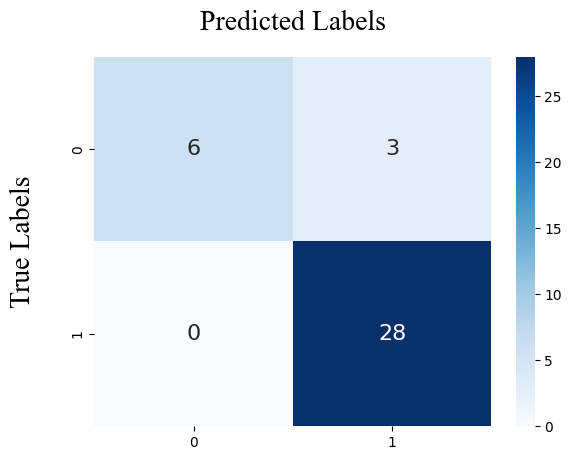

--------------------------------------------------------------------------------


In [64]:
LR = LogisticRegression()
LR.fit(X_train_scaled,y_train)
y_pred_LR = LR.predict(X_test_scaled)
print('-'*80)
print("Logistic Regression :")
print("-"*16)
Evaluate_Performance(LR, X_train_scaled, X_test_scaled, y_train, y_test)

--------------------------------------------------------------------------------
Support Vector Machine:
----------------

 • Training Accuracy Score :  87.76
 • Cross Validation Score : 87.71
 ❖ Testing Accuracy Score :  91.89
 • Precision Score is : 90.32
 • Recall Score is : 100.0
 • F1-Score Score is : 94.92
--------------------------------------------------------------------------------


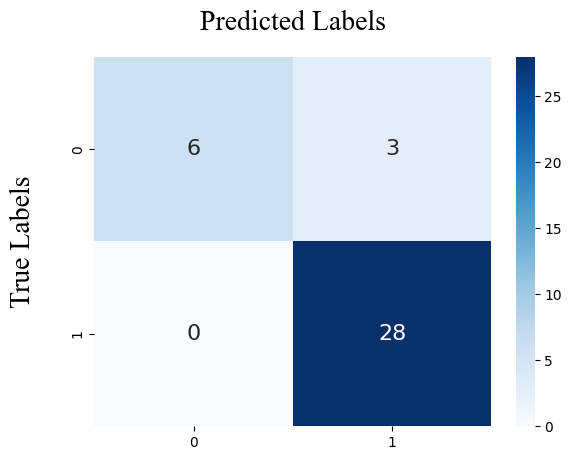

--------------------------------------------------------------------------------


In [63]:
SVM = SVC(probability=True, kernel = 'linear')
SVM.fit(X_train_scaled,y_train)
y_pred_SVM = SVM.predict(X_test_scaled)
print('-'*80)
print("Support Vector Machine:")
print("-"*16)
Evaluate_Performance(SVM, X_train_scaled, X_test_scaled, y_train, y_test)

In [65]:
models = [
    ('Logistic Regression', y_pred_LR),
    ('Support Vector Machine(linear)', y_pred_SVM),
]

In [67]:
results = []
for model_name, y_pred in models:
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    })

In [68]:
# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Define a function to highlight maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlight_max function to the relevant columns
highlight_cols = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
results_df_highlighted = results_df.style.apply(highlight_max, subset=highlight_cols, axis=1)

print("Results without balancing the dataset:")
print('-' * 70)
display(results_df_highlighted)

Results without balancing the dataset:
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.903226,1.000000,0.949153,0.918919
1,Support Vector Machine(linear),0.903226,1.000000,0.949153,0.918919


In [71]:
joblib.dump(SVM, 'SVM.pkl')

['SVM.pkl']

In [73]:
loaded_model = joblib.load('SVM.pkl')


 • Training Accuracy Score :  87.76
 • Cross Validation Score : 87.71
 ❖ Testing Accuracy Score :  91.89
 • Precision Score is : 90.32
 • Recall Score is : 100.0
 • F1-Score Score is : 94.92
--------------------------------------------------------------------------------


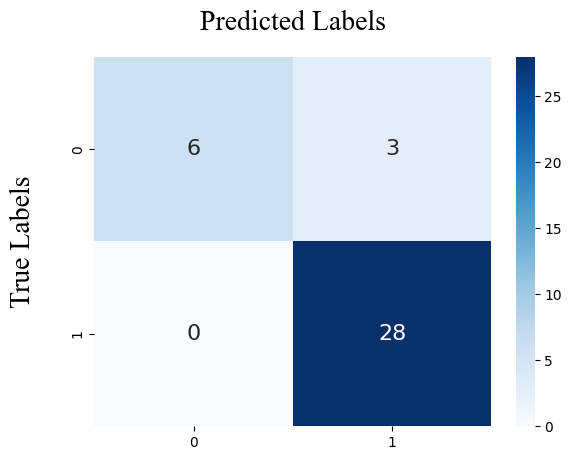

--------------------------------------------------------------------------------


In [76]:
Evaluate_Performance(loaded_model, X_train_scaled, X_test_scaled, y_train, y_test)